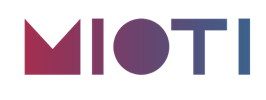


<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning</center>

# Challenge S4: Aprendizaje no supervisado: Clusterización

# Método KMeans

K-means es un método de clustering que separa los datos en ‘K’ grupos de objetos (Clusteres) de similar varianza, minimizando la suma de las distancias al cuadrado de cada objeto del Cluster a un punto medio de todos los objetos del clúster, conocido como el centroide.

Queremos hacer la tarea de agrupar distintos tipos de cereales según su información nutricional. Tenemos distintos fabricantes de cereales y deseamos realizar un estudio para ver a qué tipo de consumidores debería dirigirse cada fabricante, utilizando el análisis de clúster.

Nuestra base de datos está formada por 77 cereales distintos y tenemos 16 variables.


Veámoslas:
* Name: Nombre de los cereales
* Mfr: Fabricante de los cereales
    
    1.	A = American Home Food Products
    2.	G = General Mills
    3.	K = Kelloggs
    4.	N = Nabisco
    5.	P = Post
    6.	Q = Quaker Oats
    7.	R = Ralston Purina 


* Type: Tipo
    1.	C = Cold
    2.	H = Hot


* Calories: Calorías por porción
* Protein: Gramos de proteínas
* Fat: Gramos de grasa
* Sodium: Miligramos de sodio
* Fiber: Gramos de fibra dietética 
* Carbo: Gramos de carbohidratos
* Sugars: Gramos de azúcares
* Potass: Miligramos de potasio
* Vitamins: Vitaminas y minerales. 25 o 100 indica el porcentaje típico de la FDA recomendado. 
* Shelf: Estante de demostración (1, 2 o 3)
* Weight: Peso en onzas de una porción
* Cups: Numero de tazas en una porción
* Rating: La calificación de  los consumidores


Primero cargamos las librerías que necesitamos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (17, 10)
plt.style.use('ggplot')

y leemos los datos y hacemos una primera fase de preprocessing

In [2]:
df = pd.read_csv("cereal.csv")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


Vamos a trabajar con 3 columnas que son calorías, azucares y grasas porque cada día hay una mayor conciencia de tomar comida saludable y queremos ver respecto a esos 3 factores como quedan agrupados nuestra lista de cereales.

Definimos nuestras variables X y empezamos llamando X a la matriz formada por las columnas de las calorías, los azúcares y las grasas.

In [3]:
X = np.array(df[["calories","sugars","fat"]])
X.shape

(77, 3)

Por análisis previos, sabemos que con 3 clústeres es suficiente pero también podemos usar lo siguiente:

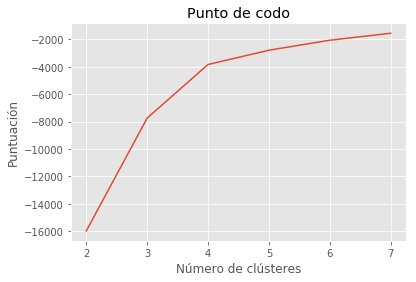

In [4]:
Nc = range(2, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clústeres')
plt.ylabel('Puntuación')
plt.title("Punto de codo")
plt.show()

Luego ejecutamos el algoritmo K-means para 3 clusters y obtenemos las etiquetas y los centroides. Las posiciones iniciales de los 3 centroides son asignadas de manera aleatoria.

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

In [6]:
labels = kmeans.fit_predict(X)

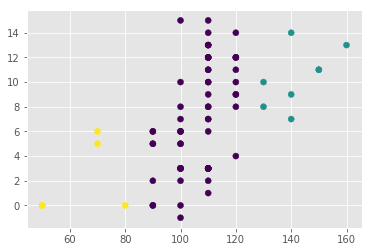

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=labels);

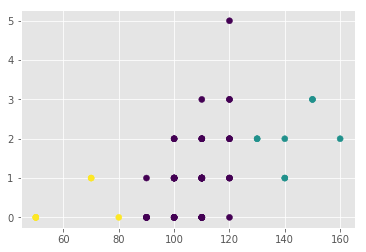

In [8]:
plt.scatter(X[:, 0], X[:, 2], c=labels);

In [9]:
kmeans.cluster_centers_

array([[106.66666667,   6.96825397,   0.95238095],
       [142.5       ,  10.375     ,   2.        ],
       [ 61.66666667,   1.83333333,   0.33333333]])

Cuando se agrupan los datos se asignan etiquetas para poder hacer la agrupación

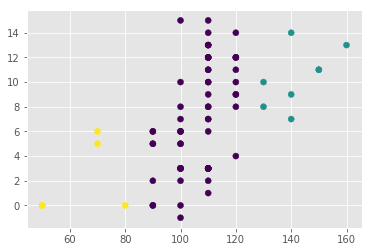

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=labels)

¿Puedes ver como se agrupan los 77 tipos de cereales por su información nutricional teniendo en cuenta las calorías, azucares y grasas en 3 clusteres?


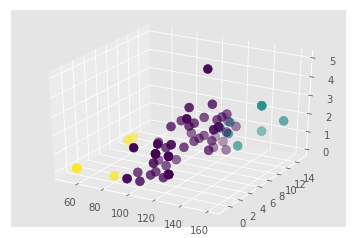

In [11]:
# Scatter

# importamos las librerias necesarias
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# Creamos la figura
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

x = X[:, 0]
y = X[:, 1]
z = X[:, 2]

# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, c=labels, marker='o', s=80)

# Mostramos el gráfico
plt.show()

Realiza 3 gráficas en 2 dimensiones (caloriasXazucar, caloriasXgrasas, grasasXazucares) con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación.
Primero hagamosla gráfica entre calorías y azucar y como quedan los clusters:

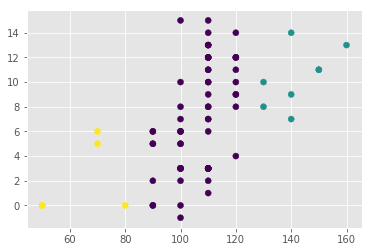

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=labels);

Ahora realiza una gráfica entre las calorías y las grasas dibujando los clusters

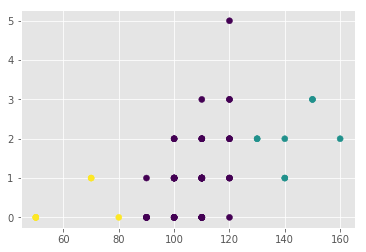

In [13]:
plt.scatter(X[:, 0], X[:, 2], c=labels);

Veamos la gráfica entre las grasas y azucares, de nuevo dibujando los clusters

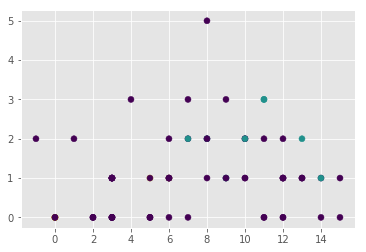

In [14]:
plt.scatter(X[:, 1], X[:, 2], c=labels);

¿en qué graficas ves una mejor diferenciación de los grupos?

En calorías y azucar y calorías y grasas

¿qué puedes decir respecto de las 3 variables? ¿cuales están clasificando mejor los grupos?

La variable caloria muestra mejor resultados para clasificar los grupos, por lo que su varianza puede ser mayor en el  conjunto de las muestras ya que facilita la distinción de los puntos.

'

¿En qué otras situaciones consideras interesante la aplicación de un análisis de conglomerados?

'

Se puede realizar segmentación de productos o mercados en relación a diversos parametros. Ademas, para ingenieria se puede aplicar para clasificar distintos comportamientos de rendimiento de servidores o en biologia para sesgar o clasificar datasets de adn con respecto a enfermedades u otros parametros. 